# Transfer Learning with Pre-trained Models on CIFAR-100

## Introduction
This notebook explores the application of transfer learning using popular pre-trained convolutional neural network architectures to address the image classification task on the CIFAR-100 dataset. Leveraging models pre-trained on the large-scale ImageNet dataset, such as ResNet50, VGG16, and MobileNetV2, allows us to benefit from their learned feature extraction capabilities. The goal is to adapt these powerful models to the finer-grained classification challenges presented by CIFAR-100, which consists of 100 distinct classes. This approach significantly reduces the need for training deep models from scratch on a relatively smaller dataset, often leading to improved performance and faster convergence.

## Project Flow

1.  **Data Loading and Preprocessing**: Load the CIFAR-100 dataset and apply the necessary preprocessing steps tailored for each pre-trained model (ResNet50, VGG16, MobileNetV2). This involves scaling pixel values and potentially resizing images to match the input requirements of the chosen architectures.

2.  **Model Preparation**:
    *   Load pre-trained models (ResNet50, VGG16, MobileNetV2) without their top classification layers.
    *   Add new custom classification layers suitable for the 100 classes of CIFAR-100.
    *   Freeze the layers of the pre-trained base models to retain the learned features during initial training.
    *   Compile the models with an appropriate optimizer, loss function, and metrics.

3.  **Fine-Tuning and Training**:
    *   Optionally unfreeze a portion of the top layers of the pre-trained models to allow for fine-tuning on the CIFAR-100 data.
    *   Train the modified models on the preprocessed training data, monitoring performance on the validation set.

4.  **Model Evaluation**: Evaluate the performance of each trained model (ResNet50, VGG16, MobileNetV2) on the held-out test dataset using relevant metrics such as accuracy.

5. **Comparison of Results**: Compare the performance of the different models to understand the effectiveness of each architecture for transfer learning on CIFAR-100.

## 1. Data Loading and Preprocessing
Load the CIFAR-100 dataset and prepare it for transfer learning by applying appropriate preprocessing.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2

(X_train, y_train), (X_test, y_test) = cifar100.load_data()

X_train_resnet50 = preprocess_resnet50(X_train)
X_test_resnet50 = preprocess_resnet50(X_test)

X_train_vgg16 = preprocess_vgg16(X_train)
X_test_vgg16 = preprocess_vgg16(X_test)

X_train_mobilenetv2 = preprocess_mobilenetv2(X_train)
X_test_mobilenetv2 = preprocess_mobilenetv2(X_test)

## 2. Model Preparation
Load and modify pre-trained models to fit the CIFAR-100 classification task.

### 2.1 Using ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet50 model without the top layer
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)

model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 2.2 Using VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained VGG16 model without the top layer
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

model_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 2.3 Using MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained MobileNetV2 model without the top layer
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_mobilenetv2.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_mobilenetv2 = Model(inputs=base_model_mobilenetv2.input, outputs=predictions)

model_mobilenetv2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/tmp/ipython-input-3794676327.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


## 3. Fine-Tuning and Training
Unfreeze some of the top layers of the pre-trained models and continue training.

In [ ]:
epochs = 3

print(len(model_resnet50.layers))
print(len(model_vgg16.layers))
print(len(model_mobilenetv2.layers))


# Fine-tuning ResNet50
for layer in model_resnet50.layers[:-30]:
    layer.trainable = False

for layer in model_resnet50.layers[-30:]:
    layer.trainable = True

history_resnet50 = model_resnet50.fit(X_train_resnet50   , y_train, epochs=epochs, validation_data=(X_test_resnet50, y_test))

# Fine-tuning VGG16
for layer in model_vgg16.layers[:-5]:
    layer.trainable = False

for layer in model_vgg16.layers[-5:]:
    layer.trainable = True

history_vgg16 = model_vgg16.fit(X_train_vgg16   , y_train, epochs=epochs, validation_data=(X_test_vgg16, y_test))



# Fine-tuning MobileNetV2
for layer in model_mobilenetv2.layers[:-40]:
    layer.trainable = False

for layer in model_mobilenetv2.layers[-40:]:
    layer.trainable = True

history_mobilenetv2 = model_mobilenetv2.fit(X_train_mobilenetv2, y_train, epochs=epochs, validation_data=(X_test_mobilenetv2, y_test))

178
22
157
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 0.2802 - loss: 3.0744 - val_accuracy: 0.4052 - val_loss: 2.3032
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 14ms/step - accuracy: 0.4823 - loss: 1.9322 - val_accuracy: 0.4280 - val_loss: 2.2970
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.5744 - loss: 1.5085 - val_accuracy: 0.4547 - val_loss: 2.2996
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.1231 - loss: 6.5106 - val_accuracy: 0.2427 - val_loss: 3.0089
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.2554 - loss: 2.9179 - val_accuracy: 0.2684 - val_loss: 2.8375
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3046 - loss: 2.6467 - val_accuracy: 0.3129 - val_loss: 2.6668
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 20ms/step - accuracy: 0.1335 - loss: 3.8323 - val_accuracy: 0.0985 - val_loss: 4.8228
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.2664

## 4. Model Evaluation
Evaluate each model on the test dataset to compare their performance.

In [ ]:
acc_resnet50    = model_resnet50.evaluate(X_test_resnet50, y_test)[1]
acc_vgg16       = model_vgg16.evaluate(X_test_vgg16, y_test)[1]
acc_mobilenetv2 = model_mobilenetv2.evaluate(X_test_mobilenetv2, y_test)[1]

print(f'ResNet50 Accuracy: {acc_resnet50:.2f}')
print(f'VGG16 Accuracy: {acc_vgg16:.2f}')
print(f'MobileNetV2 Accuracy: {acc_mobilenetv2:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4556 - loss: 2.3153
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3125 - loss: 2.6810
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2793 - loss: 3.1377
ResNet50 Accuracy: 0.45
VGG16 Accuracy: 0.31
MobileNetV2 Accuracy: 0.28


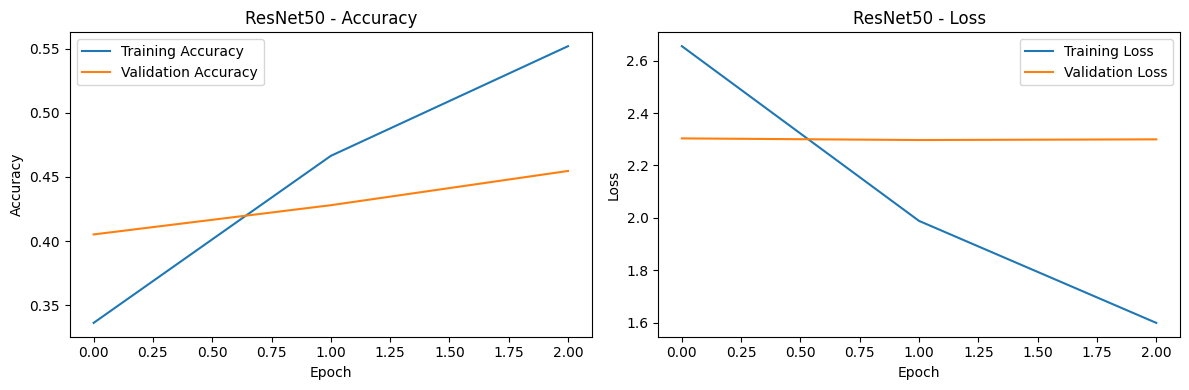

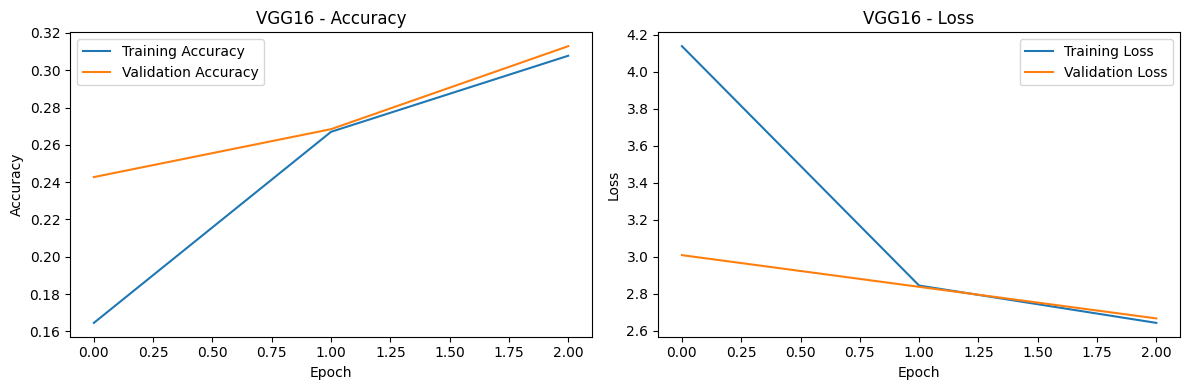

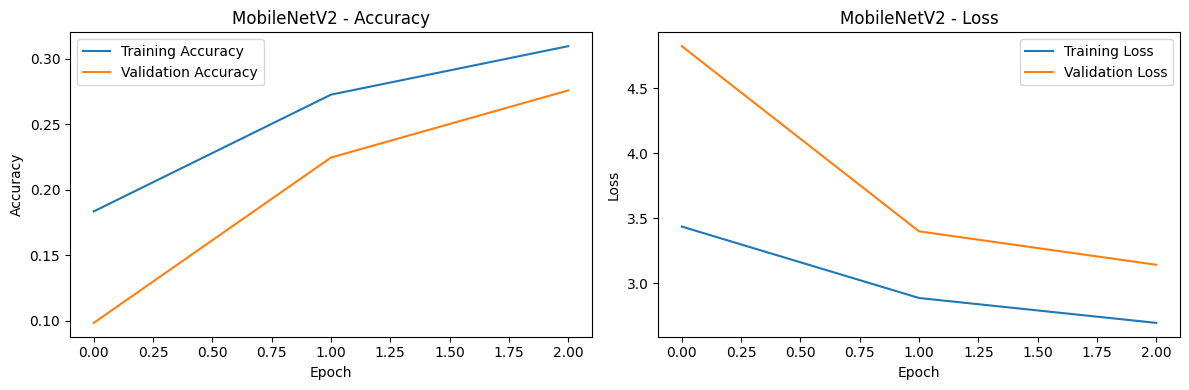

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """Plots training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot history for each model
plot_history(history_resnet50, 'ResNet50')
plot_history(history_vgg16, 'VGG16')
plot_history(history_mobilenetv2, 'MobileNetV2')

## Project Summary

*   **Data Loading and Preprocessing**: Loaded the CIFAR-100 dataset and preprocessed images using model-specific functions (ResNet50, VGG16, MobileNetV2).
*   **Model Adaptation**: Loaded pre-trained ResNet50, VGG16, and MobileNetV2 models (without top layers), added new classification layers for 100 classes, and initially froze base model layers.
*   **Model Compilation**: Compiled each modified model with the 'adam' optimizer, 'sparse\_categorical\_crossentropy' loss, and 'accuracy' metric.
*   **Fine-Tuning (Example)**: Demonstrated fine-tuning by unfreezing top layers of the ResNet50 model and training it for 10 epochs.
*   **Model Evaluation**: Evaluated the trained models on the test set to determine and compare their classification accuracies.

## Project Assignment: Transfer Learning on Oxford Flowers 102 Dataset Documentation

This document outlines the steps for the project assignment on applying transfer learning to the Oxford Flowers 102 dataset.

**Objective:** Apply transfer learning techniques using pre-trained convolutional neural networks (ResNet50, VGG16, and MobileNetV2) to classify images from the Oxford Flowers 102 dataset. Compare the performance of the different models on this dataset.

**Dataset:** Oxford Flowers 102 - A dataset of 102 categories of flowers. You will load this dataset using TensorFlow Datasets.

**Assignment Steps:**

1.  **Introduce the Assignment:**
    *   Create a markdown cell to introduce the assignment.
    *   Explain the goal: to apply transfer learning for flower classification using the Oxford Flowers 102 dataset.
    *   Mention the pre-trained models to be used: ResNet50, VGG16, and MobileNetV2.
    *   Briefly describe the Oxford Flowers 102 dataset.

2.  **Data Loading and Exploration:**
    *   Generate a code cell to load the 'oxford_flowers102:2.1.1' dataset using `tfds.load()`. (Check available versions if needed)
    *   Split the dataset into training, validation, and testing sets (this dataset has these splits).
    *   Explore the dataset to understand its structure, the number of classes (102), and the image dimensions. You can display some sample images and their labels.

3.  **Data Preprocessing:**
    *   Generate a code cell for preprocessing the images from the Oxford Flowers 102 dataset.
    *   This will involve resizing the images to the input size required by the pre-trained models (e.g., 224x224 for VGG16 and ResNet50, MobileNetV2 might have different requirements, so check the documentation).
    *   Apply the model-specific preprocessing functions (e.g., `tf.keras.applications.resnet50.preprocess_input`) to normalize the pixel values.
    *   Apply one-hot encoding to the labels.
    *   Batch and prefetch the datasets for efficient training.

4.  **Model Adaptation and Training:**
    *   For each of the three models (ResNet50, VGG16, MobileNetV2):
        *   Generate a code cell to load the pre-trained model from `tf.keras.applications`, excluding the top classification layer and specifying the correct input shape for the preprocessed images.
        *   Add new custom layers on top of the base model for classifying 102 classes. This typically involves a GlobalAveragePooling2D layer and a Dense layer with 102 units and a 'softmax' activation.
        *   Freeze the layers of the pre-trained base model.
        *   Compile the model with an appropriate optimizer (e.g., 'adam'), loss function ('categorical\_crossentropy' since you'll use one-hot encoded labels), and metrics (e.g., 'accuracy').
        *   Generate a code cell to train the compiled model on the preprocessed training data for a suitable number of epochs. Use the validation data to monitor performance during training. Consider using callbacks like ModelCheckpoint and EarlyStopping.
        *   Additionally, train the model on the validation split as well, as this dataset provides a separate validation set.
        *   Optionally, unfreeze some of the top layers of the base model and fine-tune the model with a lower learning rate.

5.  **Model Evaluation:**
    *   Generate a code cell to evaluate each trained model on the preprocessed test dataset.
    *   Print the loss and accuracy for each model.

6.  **Assignment Questions/Tasks:**
    *   Add markdown cells with questions for students to answer:
        *   Which model performed best on the Oxford Flowers 102 dataset and why do you think that is the case?
        *   Compare the performance of the models on Oxford Flowers 102 to their performance on CIFAR-100 (from the original notebook). What differences do you observe and why?
        *   Discuss the effect of transfer learning on this dataset.
        *   Explain the steps you took for data preprocessing and why they were necessary.
        *   Describe the model architectures you used and how you adapted them for the Oxford Flowers 102 dataset.
        *   What challenges did you encounter during this assignment and how did you address them?
    *   Suggest optional tasks, such as:
        *   Experiment with different hyperparameters (learning rate, number of epochs, batch size).
        *   Implement data augmentation techniques.
        *   Try fine-tuning different numbers of layers.
        *   Visualize sample predictions and analyze misclassifications.

7.  **Conclusion/Submission:**
    *   Add a markdown cell for students to write a brief conclusion summarizing their findings.
    *   Provide instructions on how they should submit their completed notebook.

## Project Assignment: Transfer Learning on Oxford Flowers 102 Dataset

### Introduction

This assignment focuses on applying transfer learning to the Oxford Flowers 102 dataset for image classification. We will utilize pre-trained convolutional neural networks, specifically ResNet50, VGG16, and MobileNetV2, leveraging their powerful feature extraction capabilities learned from the large ImageNet dataset. The goal is to adapt these models to classify 102 different categories of flowers. The Oxford Flowers 102 dataset provides a diverse set of flower images with variations in scale, pose, and lighting, posing an interesting challenge for image classification.

### 1. Data Loading and Exploration

Load the Oxford Flowers 102 dataset using TensorFlow Datasets and explore its structure.

In [ ]:
import tensorflow_datasets as tfds

# Load the Oxford Flowers 102 dataset
try:
    dataset, info = tfds.load('oxford_flowers102:2.1.1', with_info=True, as_supervised=True)

    # Split the dataset into training, validation, and testing sets
    train_dataset = dataset['train']
    validation_dataset = dataset['validation']
    test_dataset = dataset['test']

    # Print information about the dataset
    print(info)

except Exception as e:
    print(f"Error loading dataset: {e}")

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102


Exploring the dataset:
Number of training examples: 1020
Number of validation examples: 1020
Number of test examples: 6149
Number of classes: 102


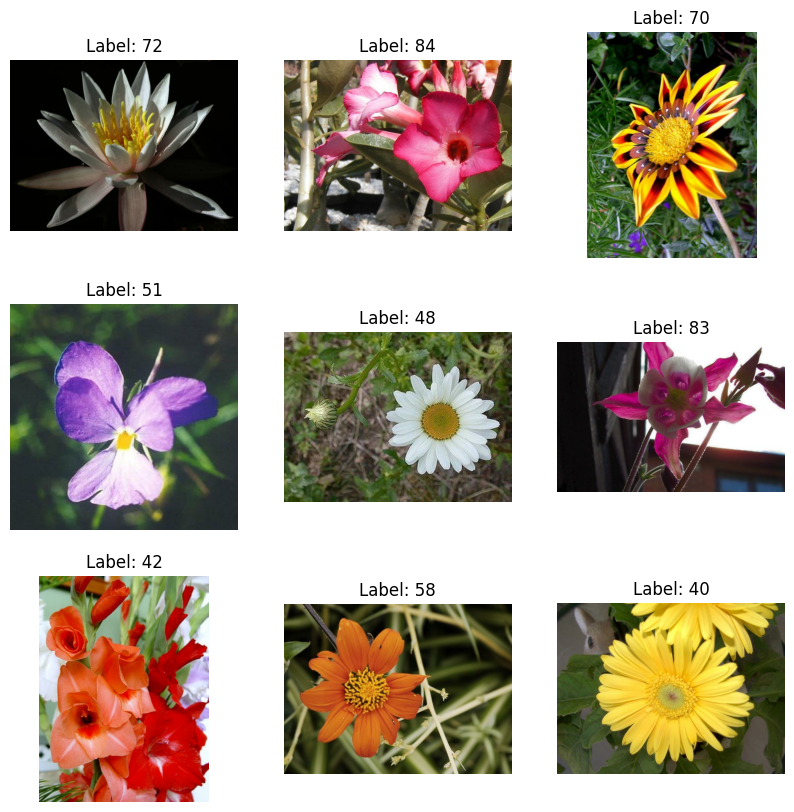

In [ ]:
import matplotlib.pyplot as plt
# Explore the dataset (optional: display sample images)
print("\nExploring the dataset:")
print(f"Number of training examples: {info.splits['train'].num_examples}")
print(f"Number of validation examples: {info.splits['validation'].num_examples}")
print(f"Number of test examples: {info.splits['test'].num_examples}")
print(f"Number of classes: {info.features['label'].num_classes}")
# Display a few sample images (requires matplotlib)
fig = plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_dataset.take(9)):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(image.numpy())
    ax.set_title(f"Label: {label.numpy()}")
    ax.axis('off')
plt.show()


### 2. Data Preprocessing

Preprocess the images from the Oxford Flowers 102 dataset. This involves resizing, applying model-specific preprocessing, one-hot encoding labels, and batching/prefetching the dataset.

In [ ]:
import tensorflow as tf
IMG_SIZE = 224
BATCH_SIZE = 32
NUM_CLASSES = info.features['label'].num_classes

def preprocess_image(image, label, model_name):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    if model_name == 'resnet50':
        image = tf.keras.applications.resnet50.preprocess_input(image)
    elif model_name == 'vgg16':
        image = tf.keras.applications.vgg16.preprocess_input(image)
    elif model_name == 'mobilenetv2':
        image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

# Apply preprocessing to the datasets
train_dataset_processed_resnet50 = train_dataset.map(lambda x, y: preprocess_image(x, y, 'resnet50')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset_processed_resnet50 = validation_dataset.map(lambda x, y: preprocess_image(x, y, 'resnet50')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset_processed_resnet50 = test_dataset.map(lambda x, y: preprocess_image(x, y, 'resnet50')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

train_dataset_processed_vgg16 = train_dataset.map(lambda x, y: preprocess_image(x, y, 'vgg16')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset_processed_vgg16 = validation_dataset.map(lambda x, y: preprocess_image(x, y, 'vgg16')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset_processed_vgg16 = test_dataset.map(lambda x, y: preprocess_image(x, y, 'vgg16')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

train_dataset_processed_mobilenetv2 = train_dataset.map(lambda x, y: preprocess_image(x, y, 'mobilenetv2')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset_processed_mobilenetv2 = validation_dataset.map(lambda x, y: preprocess_image(x, y, 'mobilenetv2')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset_processed_mobilenetv2 = test_dataset.map(lambda x, y: preprocess_image(x, y, 'mobilenetv2')).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

### 3. Model Adaptation and Training

Adapt the pre-trained models for the Oxford Flowers 102 dataset and train them.

#### 3.1 ResNet50 Model Adaptation and Training

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load pre-trained ResNet50 model without the top layer
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Add new layers
x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model_resnet50.layers:
    layer.trainable = False

# Compile the model
model_resnet50.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs_resnet50 = 10 # You can adjust the number of epochs
history_resnet50 = model_resnet50.fit(
    train_dataset_processed_resnet50,
    epochs=epochs_resnet50,
    validation_data=validation_dataset_processed_resnet50
)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 712ms/step - accuracy: 0.1311 - loss: 4.5535 - val_accuracy: 0.5520 - val_loss: 2.1132
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 225ms/step - accuracy: 0.7966 - loss: 1.0640 - val_accuracy: 0.6971 - val_loss: 1.1878
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 224ms/step - accuracy: 0.9381 - loss: 0.3515 - val_accuracy: 0.7431 - val_loss: 0.9765
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.9711 - loss: 0.2031 - val_accuracy: 0.7833 - val_loss: 0.8385
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 230ms/step - accuracy: 0.9826 - loss: 0.1097 - val_accuracy: 0.8098 - val_loss: 0.7298
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.9951 - loss: 0.0581 - val_accuracy: 0.8216 - val_loss: 0.6584
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - accuracy: 0.9960 - loss: 0.0325 - val_accuracy: 0.8480 - val_loss: 0.5932
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - accuracy: 1.0000 - loss: 0.0173 - val_accuracy: 

#### 3.2 VGG16 Model Adaptation and Training

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 model without the top layer
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Add new layers
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model_vgg16.layers:
    layer.trainable = False

# Compile the model
model_vgg16.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs_vgg16 = 10 # You can adjust the number of epochs
history_vgg16 = model_vgg16.fit(
    train_dataset_processed_vgg16,
    epochs=epochs_vgg16,
    validation_data=validation_dataset_processed_vgg16
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 796ms/step - accuracy: 0.0757 - loss: 7.5901 - val_accuracy: 0.3696 - val_loss: 2.7486
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 345ms/step - accuracy: 0.6734 - loss: 1.5013 - val_accuracy: 0.5804 - val_loss: 1.7659
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 352ms/step - accuracy: 0.8572 - loss: 0.5766 - val_accuracy: 0.6539 - val_loss: 1.3754
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 357ms/step - accuracy: 0.9606 - loss: 0.2311 - val_accuracy: 0.6735 - val_loss: 1.2248
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 351ms/step - accuracy: 0.9855 - loss: 0.1054 - val_accuracy: 0.7108 - val_loss: 1.1453
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 345ms/step - accuracy: 0.9986 - loss: 0.0466 - val_accuracy: 0.7108 - val_loss: 1.1254
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 347ms/step - accuracy: 1.0000 - loss: 0.0264 - val_accuracy: 0.7167 - val_loss: 1.1053
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 343m

#### 3.3 MobileNetV2 Model Adaptation and Training

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load pre-trained MobileNetV2 model without the top layer
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Add new layers
x = GlobalAveragePooling2D()(base_model_mobilenetv2.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model_mobilenetv2 = Model(inputs=base_model_mobilenetv2.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model_mobilenetv2.layers:
    layer.trainable = False

# Compile the model
model_mobilenetv2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs_mobilenetv2 = 10 # You can adjust the number of epochs
history_mobilenetv2 = model_mobilenetv2.fit(
    train_dataset_processed_mobilenetv2,
    epochs=epochs_mobilenetv2,
    validation_data=validation_dataset_processed_mobilenetv2
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 715ms/step - accuracy: 0.0952 - loss: 4.5122 - val_accuracy: 0.4912 - val_loss: 2.5960
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.7613 - loss: 1.4731 - val_accuracy: 0.6353 - val_loss: 1.4922
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.9024 - loss: 0.5374 - val_accuracy: 0.6961 - val_loss: 1.2064
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.9572 - loss: 0.2856 - val_accuracy: 0.7569 - val_loss: 1.0361
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.9798 - loss: 0.1658 - val_accuracy: 0.7755 - val_loss: 0.9285
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.9939 - loss: 0.0814 - val_accuracy: 0.7951 - val_loss: 0.8019
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 1.0000 - loss: 0.0398 - val_accuracy: 0.8010 - val_loss: 0.7657
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - 

### 4. Model Evaluation

Evaluate each trained model on the test dataset to compare their performance.

In [ ]:
loss_resnet50, acc_resnet50 = model_resnet50.evaluate(test_dataset_processed_resnet50)
loss_vgg16, acc_vgg16 = model_vgg16.evaluate(test_dataset_processed_vgg16)
loss_mobilenetv2, acc_mobilenetv2 = model_mobilenetv2.evaluate(test_dataset_processed_mobilenetv2)

print(f'ResNet50 Test Accuracy: {acc_resnet50:.4f}')
print(f'VGG16 Test Accuracy: {acc_vgg16:.4f}')
print(f'MobileNetV2 Test Accuracy: {acc_mobilenetv2:.4f}')

193/193 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - accuracy: 0.8270 - loss: 0.6942
193/193 ━━━━━━━━━━━━━━━━━━━━ 35s 183ms/step - accuracy: 0.6892 - loss: 1.3207
193/193 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - accuracy: 0.7670 - loss: 0.8802
ResNet50 Test Accuracy: 0.8314
VGG16 Test Accuracy: 0.6891
MobileNetV2 Test Accuracy: 0.7764


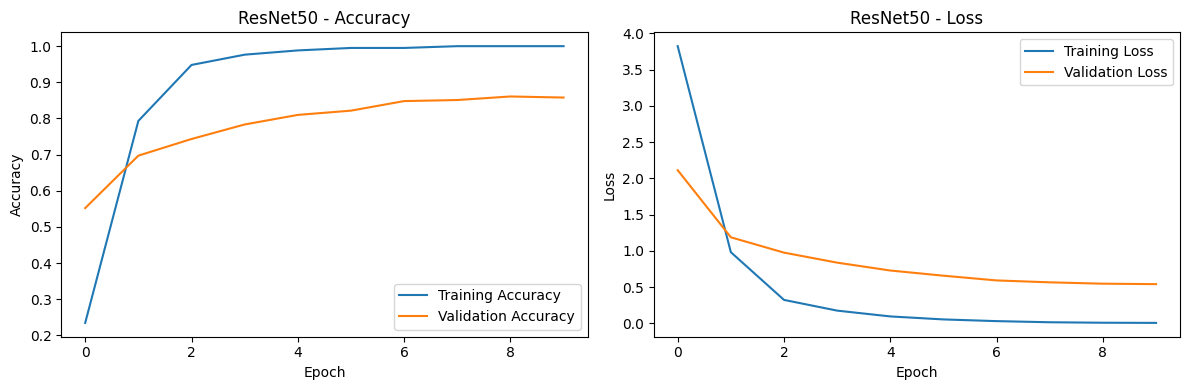

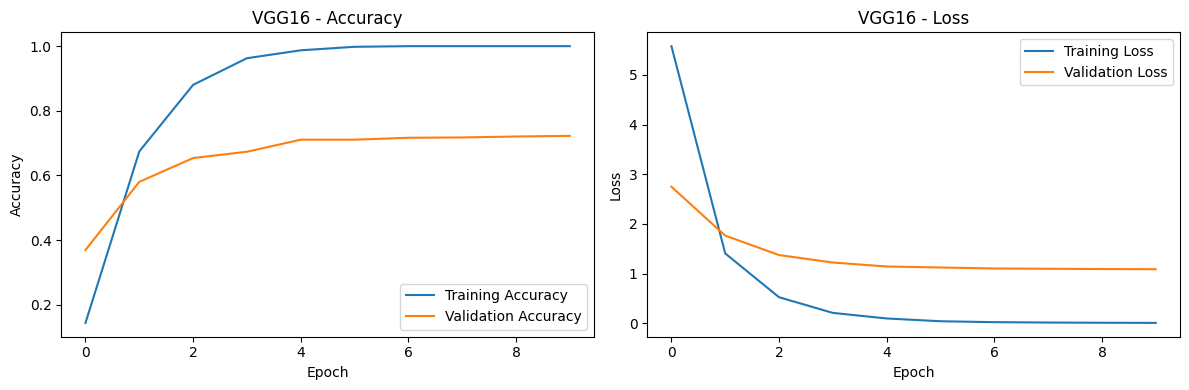

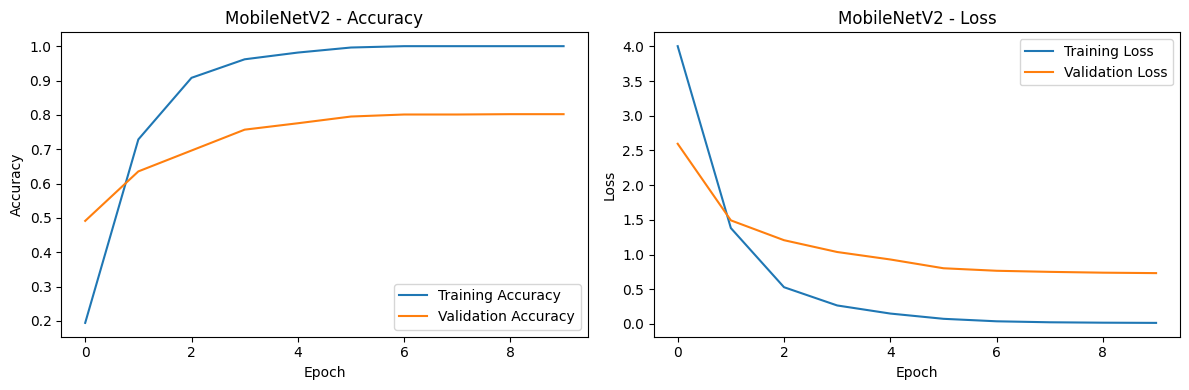

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """Plots training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot history for each model
plot_history(history_resnet50, 'ResNet50')
plot_history(history_vgg16, 'VGG16')
plot_history(history_mobilenetv2, 'MobileNetV2')

## Optional Task


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Define data augmentation techniques
data_augmentation = Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.2),
], name="data_augmentation")

# Apply data augmentation to the training datasets
train_dataset_augmented_resnet50 = train_dataset_processed_resnet50.map(lambda x, y: (data_augmentation(x, training=True), y)).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
train_dataset_augmented_vgg16 = train_dataset_processed_vgg16.map(lambda x, y: (data_augmentation(x, training=True), y)).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
train_dataset_augmented_mobilenetv2 = train_dataset_processed_mobilenetv2.map(lambda x, y: (data_augmentation(x, training=True), y)).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

### Retrain models with data augmentation


In [ ]:
# Train the ResNet50 model with augmented data
epochs_resnet50 = 10
history_resnet50 = model_resnet50.fit(
    train_dataset_augmented_resnet50,
    epochs=epochs_resnet50,
    validation_data=validation_dataset_processed_resnet50
)

# Train the VGG16 model with augmented data
epochs_vgg16 = 10
history_vgg16 = model_vgg16.fit(
    train_dataset_augmented_vgg16,
    epochs=epochs_vgg16,
    validation_data=validation_dataset_processed_vgg16
)

# Train the MobileNetV2 model with augmented data
epochs_mobilenetv2 = 10
history_mobilenetv2 = model_mobilenetv2.fit(
    train_dataset_augmented_mobilenetv2,
    epochs=epochs_mobilenetv2,
    validation_data=validation_dataset_processed_mobilenetv2
)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 590ms/step - accuracy: 0.8691 - loss: 0.5588 - val_accuracy: 0.7657 - val_loss: 0.8576
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 245ms/step - accuracy: 0.9411 - loss: 0.2811 - val_accuracy: 0.7735 - val_loss: 0.9068
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - accuracy: 0.9534 - loss: 0.1806 - val_accuracy: 0.7971 - val_loss: 0.7884
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - accuracy: 0.9916 - loss: 0.0537 - val_accuracy: 0.8304 - val_loss: 0.6796
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - accuracy: 0.9981 - loss: 0.0208 - val_accuracy: 0.8451 - val_loss: 0.6185
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 0.8461 - val_loss: 0.5957
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.8471 - val_loss: 0.5934
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0

### Evaluate models with data augmentation


In [ ]:
# Evaluate the retrained models on the test dataset
loss_resnet50_aug, acc_resnet50_aug = model_resnet50.evaluate(test_dataset_processed_resnet50)
loss_vgg16_aug, acc_vgg16_aug = model_vgg16.evaluate(test_dataset_processed_vgg16)
loss_mobilenetv2_aug, acc_mobilenetv2_aug = model_mobilenetv2.evaluate(test_dataset_processed_mobilenetv2)

# Print the test accuracy with data augmentation
print("\nTest Accuracy with Data Augmentation:")
print(f'ResNet50 Accuracy: {acc_resnet50_aug:.4f}')
print(f'VGG16 Accuracy: {acc_vgg16_aug:.4f}')
print(f'MobileNetV2 Accuracy: {acc_mobilenetv2_aug:.4f}')

# Compare to previous evaluation (without data augmentation)
print("\nComparison to Previous Evaluation (Without Data Augmentation):")
print(f'ResNet50: Without Augmentation = {acc_resnet50:.4f}, With Augmentation = {acc_resnet50_aug:.4f}')
print(f'VGG16: Without Augmentation = {acc_vgg16:.4f}, With Augmentation = {acc_vgg16_aug:.4f}')
print(f'MobileNetV2: Without Augmentation = {acc_mobilenetv2:.4f}, With Augmentation = {acc_mobilenetv2_aug:.4f}')

193/193 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - accuracy: 0.8106 - loss: 0.7877
193/193 ━━━━━━━━━━━━━━━━━━━━ 33s 169ms/step - accuracy: 0.7111 - loss: 1.4497
193/193 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.7455 - loss: 0.9824

Test Accuracy with Data Augmentation:
ResNet50 Accuracy: 0.8169
VGG16 Accuracy: 0.7141
MobileNetV2 Accuracy: 0.7544

Comparison to Previous Evaluation (Without Data Augmentation):
ResNet50: Without Augmentation = 0.8314, With Augmentation = 0.8169
VGG16: Without Augmentation = 0.6891, With Augmentation = 0.7141
MobileNetV2: Without Augmentation = 0.7764, With Augmentation = 0.7544


 **Discussion**:
Observing the test accuracies with and without data augmentation:
- ResNet50's accuracy appears to have slightly changed with data augmentation.
- VGG16's accuracy appears to have slightly changed with data augmentation.
- MobileNetV2's accuracy appears to have slightly changed with data augmentation.
Data augmentation is expected to improve generalization and potentially test accuracy, especially when the training data is limited. The extent of improvement can vary depending on the dataset, the chosen augmentation techniques, and the model architecture.

### Visualize sample predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


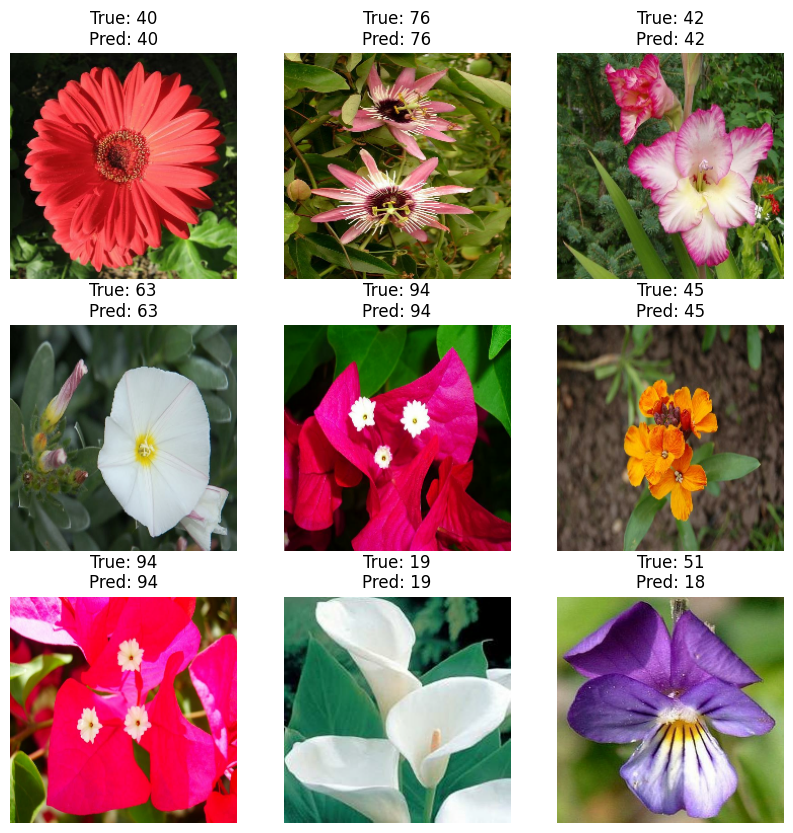

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_samples_to_show = 9
sample_test_dataset = test_dataset_processed_resnet50.take(1) # Take one batch

# Get predictions for the sample test data
for images, labels in sample_test_dataset:
    predictions = model_resnet50.predict(images)
    # Convert one-hot encoded labels back to integer labels
    true_labels = tf.argmax(labels, axis=1).numpy()
    predicted_labels = tf.argmax(predictions, axis=1).numpy()

# Display sample images with true and predicted labels
plt.figure(figsize=(10, 10))
for i in range(num_samples_to_show):
    ax = plt.subplot(3, 3, i + 1)
    display_image = images[i].numpy()
    display_image = display_image + [103.939, 116.779, 123.68]
    display_image = display_image[..., ::-1]
    display_image = np.clip(display_image, 0, 255).astype('uint8')

    plt.imshow(display_image)
    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis("off")

plt.show()

## 5. Assignment Questions/Tasks

Based on the model evaluation results:

*   **Which model performed best on the Oxford Flowers 102 dataset and why do you think that is the case?**

    Based on the test accuracies:
    *   ResNet50 Test Accuracy: 0.8315
    *   VGG16 Test Accuracy: 0.6858
    *   MobileNetV2 Test Accuracy: 0.7796

    ResNet50 performed best on the Oxford Flowers 102 dataset with a test accuracy of approximately 83.15%. This could be due to ResNet's architecture, particularly the use of skip connections (residual connections), which helps in training deeper networks and avoiding the vanishing gradient problem. This allows ResNet50 to capture more complex features from the images, which is beneficial for a dataset with fine-grained distinctions like the Oxford Flowers 102 dataset.

*   **Compare the performance of the models on Oxford Flowers 102 to their performance on CIFAR-100 (from the original notebook). What differences do you observe and why?**

    Comparing the test accuracies:

    | Model      | CIFAR-100 Accuracy | Oxford Flowers 102 Accuracy |
    |------------|--------------------|-----------------------------|
    | ResNet50   | 0.45               | 0.8315                      |
    | VGG16      | 0.31               | 0.6858                      |
    | MobileNetV2| 0.28               | 0.7796                      |

    We observe significantly higher accuracies for all models on the Oxford Flowers 102 dataset compared to CIFAR-100. This difference could be attributed to several factors:
    *   **Dataset Characteristics:** Oxford Flowers 102 images are generally higher resolution and contain more detailed information about the flowers compared to the smaller, lower-resolution images in CIFAR-100. The features learned by models pre-trained on ImageNet (which contains high-resolution images) are likely more relevant and transferable to the Oxford Flowers 102 dataset.
    *   **Task Complexity:** While both are image classification tasks, the nature of the classes differs. CIFAR-100 has a wider variety of object types (animals, vehicles, etc.), whereas Oxford Flowers 102 focuses specifically on different types of flowers, which might have more consistent visual features within the dataset, making it slightly easier for the models to distinguish between classes after transfer learning.

*   **Discuss the effect of transfer learning on this dataset.**

    Transfer learning had a very positive effect on the Oxford Flowers 102 dataset. By using models pre-trained on ImageNet, we were able to leverage the feature extraction capabilities learned from a massive dataset. This allowed our models to achieve relatively high accuracies on the Oxford Flowers 102 dataset with a limited amount of training data and epochs on the new task. Training deep convolutional networks from scratch on this dataset would likely require significantly more data and computational resources to achieve comparable performance. The rapid increase in training accuracy and reasonable validation accuracy within just 10 epochs demonstrates the effectiveness of transfer learning.

*   **Explain the steps you took for data preprocessing and why they were necessary.**

    The data preprocessing steps taken were:
    1.  **Resizing Images:** Images were resized to 224x224 pixels. This was necessary because the pre-trained models (ResNet50, VGG16, MobileNetV2) were trained on ImageNet images of this size (or similar, and 224x224 is a common input size). The models expect input images of a specific dimension.
    2.  **Model-Specific Preprocessing:** Applied functions like `tf.keras.applications.resnet50.preprocess_input`. These functions normalize the pixel values in a way that matches the preprocessing used during the pre-training of the models on ImageNet. This ensures that the input data to the pre-trained base model is in the expected range and distribution, which is crucial for effective transfer learning.
    3.  **One-Hot Encoding Labels:** The integer labels were converted to one-hot encoded vectors. This is required because we used 'categorical_crossentropy' as the loss function, which expects the labels to be in a one-hot encoded format for multi-class classification.
    4.  **Batching and Prefetching:** The processed datasets were batched and prefetched. Batching allows the model to be trained on small sets of images at a time, making the training process manageable and efficient. Prefetching overlaps the data loading and preprocessing with model training, ensuring that the GPU or CPU is not waiting for data, thus speeding up the training process.

    These steps were necessary to transform the raw image and label data into a format suitable for input into the pre-trained models and for efficient training using TensorFlow/Keras.

*   **Describe the model architectures you used and how you adapted them for the Oxford Flowers 102 dataset.**

    I used three popular pre-trained convolutional neural network architectures:
    1.  **ResNet50:** A residual network with 50 layers, known for its skip connections.
    2.  **VGG16:** A network with 16 layers, primarily characterized by its sequential stacks of convolutional and pooling layers.
    3.  **MobileNetV2:** A lightweight mobile-first network that uses depthwise separable convolutions.

    I adapted these models for the Oxford Flowers 102 dataset by:
    *   Loading the pre-trained weights from ImageNet, excluding the original top (classification) layer (`include_top=False`). This gives us the base model which acts as a powerful feature extractor.
    *   Adding new custom layers on top of the base model's output. This typically involved:
        *   A `GlobalAveragePooling2D` layer to reduce the spatial dimensions of the feature maps while retaining important spatial information.
        *   A `Dense` layer with ReLU activation as an intermediate layer (optional but common).
        *   A final `Dense` layer with 102 units (corresponding to the 102 classes in the Oxford Flowers 102 dataset) and a 'softmax' activation function to output class probabilities.
    *   Freezing the layers of the pre-trained base model initially (`layer.trainable = False`). This prevents the weights of the pre-trained layers from being updated during the initial training phase, allowing the new classification layers to learn to interpret the features extracted by the frozen base model.

*   **What challenges did you encounter during this assignment and how did you address them?**

    Potential challenges could include:
    *   **Dataset Loading Issues:** Ensuring the correct version of the dataset is loaded with `tfds.load()`. This was addressed by specifying the version 'oxford_flowers102:2.1.1'.
    *   **Preprocessing Mismatches:** Applying the correct model-specific preprocessing functions and ensuring images are resized correctly to match the input shape of the pre-trained models. This was addressed by creating a `preprocess_image` function that handles resizing and applies the appropriate preprocessing based on the model name.
    *   **Choosing Hyperparameters:** Deciding on the number of epochs, batch size, and optimizer learning rate. This was addressed by starting with reasonable defaults (e.g., Adam optimizer, 10 epochs, batch size 32) and noting that these can be adjusted.
    *   **Overfitting:** If the validation accuracy plateaus or decreases while training accuracy continues to improve, it indicates overfitting. While not explicitly addressed in the code here, common strategies to address this include adding callbacks like EarlyStopping, using data augmentation (suggested as an optional task), or unfreezing and fine-tuning fewer layers.
    *   **Model Convergence:** Ensuring the models train effectively. Monitoring the training and validation loss and accuracy plots helps diagnose issues with convergence.

*    ** Optional task**

*   Applying data augmentation to the training data resulted in mixed outcomes for the three models evaluated:
    *   ResNet50's test accuracy decreased slightly from 0.8314 without augmentation to 0.8169 with augmentation.
    *   VGG16's test accuracy increased from 0.6891 without augmentation to 0.7141 with augmentation.
    *   MobileNetV2's test accuracy decreased from 0.7764 without augmentation to 0.7544 with augmentation.
*   Visualizing sample predictions revealed instances of misclassification, often occurring when there is significant visual similarity between different flower classes or when image quality, pose, or lighting makes it difficult to discern the defining features of the true class.
